#匯入tensorflow_version 2.x

In [1]:
%tensorflow_version 2.x

In [2]:
import tensorflow as tf
tf.__version__ 

'2.8.0'

# 資料預處理

In [3]:
import tensorflow.keras.utils as np_utils
import numpy as np

In [4]:
from tensorflow.keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
print("train data:",'images:',x_train_image.shape,"labels:",y_train_label.shape) 
print("test  data:",'images:',x_test_image.shape ," labels:",y_test_label.shape) 

train data: images: (60000, 28, 28) labels: (60000,)
test  data: images: (10000, 28, 28)  labels: (10000,)


In [6]:
x_train=x_train_image.reshape(-1,784).astype('float32')
x_test=x_test_image.reshape(-1,784).astype('float32')

In [7]:
x_train_normalize = x_train / 255
x_test_normalize = x_test / 255

In [8]:
y_train_onehot = np_utils.to_categorical(y_train_label)
y_test_onehot = np_utils.to_categorical(y_test_label)

In [9]:
class_names =["0","1","2","3","4","5","6","7","8","9"]

# 建立模型

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import Dropout

In [11]:
model = Sequential()

In [12]:
model.add(Dense(input_dim=784,
     kernel_initializer='normal',units=1000, 
     activation='relu'))

In [13]:
model.add(Dropout(0.5))

In [14]:
model.add(Dense(kernel_initializer='normal',
        units=10,activation='softmax'))

In [15]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              785000    
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense_1 (Dense)             (None, 10)                10010     
                                                                 
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


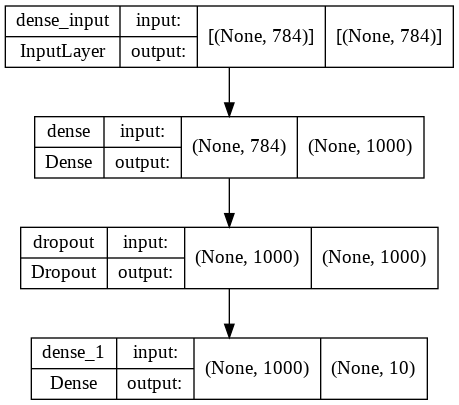

In [16]:
tf.keras.utils.plot_model(model, 'cifarcnn.png', show_shapes=True)

# 訓練模型

In [17]:
model.compile(
    metrics=['acc'],optimizer='adam',
    loss='categorical_crossentropy')

In [18]:
train_history=model.fit(
    x=x_train_normalize,y=y_train_onehot,validation_split=0.2,
    batch_size=200,epochs=10,verbose=2)

Epoch 1/10
240/240 - 11s - loss: 0.3470 - acc: 0.8962 - val_loss: 0.1667 - val_acc: 0.9530 - 11s/epoch - 48ms/step
Epoch 2/10
240/240 - 12s - loss: 0.1584 - acc: 0.9544 - val_loss: 0.1159 - val_acc: 0.9665 - 12s/epoch - 49ms/step
Epoch 3/10
240/240 - 11s - loss: 0.1174 - acc: 0.9658 - val_loss: 0.1014 - val_acc: 0.9708 - 11s/epoch - 46ms/step
Epoch 4/10
240/240 - 7s - loss: 0.0911 - acc: 0.9728 - val_loss: 0.0845 - val_acc: 0.9751 - 7s/epoch - 29ms/step
Epoch 5/10
240/240 - 4s - loss: 0.0746 - acc: 0.9770 - val_loss: 0.0837 - val_acc: 0.9762 - 4s/epoch - 19ms/step
Epoch 6/10
240/240 - 5s - loss: 0.0642 - acc: 0.9799 - val_loss: 0.0758 - val_acc: 0.9775 - 5s/epoch - 19ms/step
Epoch 7/10
240/240 - 5s - loss: 0.0542 - acc: 0.9837 - val_loss: 0.0724 - val_acc: 0.9782 - 5s/epoch - 19ms/step
Epoch 8/10
240/240 - 5s - loss: 0.0481 - acc: 0.9850 - val_loss: 0.0701 - val_acc: 0.9801 - 5s/epoch - 19ms/step
Epoch 9/10
240/240 - 5s - loss: 0.0425 - acc: 0.9865 - val_loss: 0.0716 - val_acc: 0.9793 

# 以圖形顯示訓練過程

In [19]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train_key,valid_key):
    plt.plot(train_history.history[train_key],'--')
    plt.plot(train_history.history[valid_key])
    plt.title('Train History')
    plt.ylabel(train_key)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

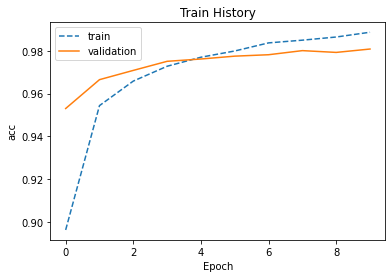

In [20]:
show_train_history(train_history,'acc','val_acc')

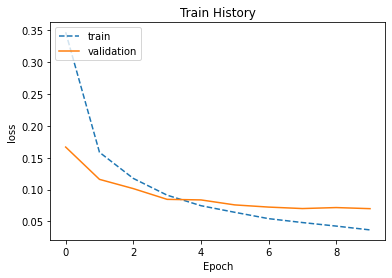

In [21]:
show_train_history(train_history,'loss','val_loss') 

# 評估模型準確率

In [22]:
scores = model.evaluate(x_test_normalize, y_test_onehot,verbose=2) 

313/313 - 1s - loss: 0.0606 - acc: 0.9820 - 1s/epoch - 4ms/step


# 進行預測

不能使用model.predict_classes

In [23]:
#prediction=  model.predict_classes(x_test_normalize)

In [24]:
#prediction

建議使用model.predict +tf.argmax 取代

In [25]:
probability = model.predict(x_test_normalize)

In [26]:
prediction=tf.argmax(probability, axis=-1).numpy() 

In [27]:
prediction

array([7, 2, 1, ..., 4, 5, 6])

model.predict(x)詳細介紹

In [28]:
probability = model.predict(x_test_normalize)

In [29]:
probability.shape

(10000, 10)

In [30]:
probability [:2]

array([[3.0139415e-08, 1.0144042e-08, 1.9298391e-06, 6.7553206e-05,
        1.6561381e-11, 1.2121515e-07, 3.5661578e-11, 9.9992788e-01,
        6.8826964e-08, 2.3912376e-06],
       [8.0864510e-11, 2.9461278e-06, 9.9999702e-01, 1.0775218e-08,
        1.3210816e-15, 2.2124444e-09, 6.2642207e-09, 4.0962727e-14,
        9.9051487e-09, 2.5278123e-14]], dtype=float32)

tf.argmax用法

In [31]:
data = tf.constant([[3, 2, 1],
           [1, 2, 3],
           [2, 5, 4],
           [1, 9, 3]])

In [32]:
print('     ',tf.argmax(data,0).numpy())

      [0 3 2]


In [33]:
print('    ',tf.argmax(data,-1).numpy())

     [0 2 1 1]


預測類別

In [34]:
probability[0]

array([3.0139415e-08, 1.0144042e-08, 1.9298391e-06, 6.7553206e-05,
       1.6561381e-11, 1.2121515e-07, 3.5661578e-11, 9.9992788e-01,
       6.8826964e-08, 2.3912376e-06], dtype=float32)

In [35]:
prediction=tf.argmax(probability, axis=-1).numpy()

In [36]:
prediction[0]

7

#顯示機率

In [37]:
def show_predicted_probability(images,labels,
     prediction,probability,idx):
  plt.figure(figsize=(1,1));
  plt.xticks([]);plt.yticks([])
  plt.imshow(images[idx],cmap='binary')
  plt.show()
  if len(labels)>0:print('label:',labels[idx])
  if len(labels)>0:print('predict:',prediction[idx])
  for i in range(10):
    print(i,' Probability:%.9f'%(probability[idx][i])) 

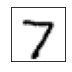

label: 7
predict: 7
0  Probability:0.000000030
1  Probability:0.000000010
2  Probability:0.000001930
3  Probability:0.000067553
4  Probability:0.000000000
5  Probability:0.000000121
6  Probability:0.000000000
7  Probability:0.999927878
8  Probability:0.000000069
9  Probability:0.000002391


In [38]:
show_predicted_probability(x_test_image,y_test_label,
              prediction,probability,0)

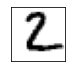

label: 2
predict: 2
0  Probability:0.000000000
1  Probability:0.000002946
2  Probability:0.999997020
3  Probability:0.000000011
4  Probability:0.000000000
5  Probability:0.000000002
6  Probability:0.000000006
7  Probability:0.000000000
8  Probability:0.000000010
9  Probability:0.000000000


In [39]:
show_predicted_probability(x_test_image,y_test_label,
             prediction,probability,1)

In [40]:
prediction=tf.argmax(probability, axis=1).numpy()

In [41]:
prediction[0]

7

In [42]:
prediction=tf.argmax(model.predict(x_test_normalize), axis=-1).numpy()

In [43]:
prediction 

array([7, 2, 1, ..., 4, 5, 6])

#顯示預測結果

不能使用model.predict_classes

In [44]:
#prediction= model.predict_classes(x_test_normalize)

In [45]:
#prediction

建議使用model.predict +tf.argmax 取代

In [46]:
probability = model.predict(x_test_normalize)

In [47]:
prediction=tf.argmax(probability, axis=-1).numpy() 

In [48]:
prediction

array([7, 2, 1, ..., 4, 5, 6])

In [49]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(
    images,labels,prediction,idx,num=10):
    fig = plt.gcf().set_size_inches(12, 12)    
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx]) 
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

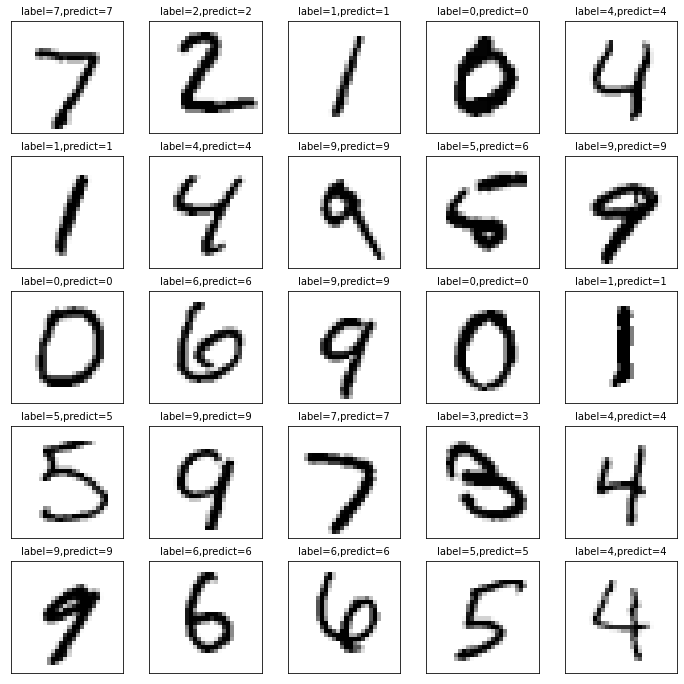

In [50]:
plot_images_labels_prediction(x_test_image,y_test_label,
               prediction,idx=0,num=25)

# confusion matrix

In [51]:
import pandas as pd

In [52]:
cm=pd.crosstab(index=y_test_label,columns=prediction,
       rownames=['label'],colnames=['predict'])

In [53]:
cm

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,972,0,1,1,0,1,2,1,2,0
1,0,1123,4,1,0,1,2,0,4,0
2,3,0,1016,2,1,0,2,5,3,0
3,0,0,1,999,0,3,0,3,2,2
4,0,0,3,0,961,0,6,2,2,8
5,2,0,0,9,1,870,5,0,4,1
6,2,2,0,1,1,4,947,0,1,0
7,1,4,9,4,1,0,0,1003,2,4
8,2,0,2,4,3,4,2,3,952,2


# 查看預測錯誤資料

In [54]:
df = pd.DataFrame({'label':y_test_label, 'predict':prediction})
df[:5]

,label,predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4


In [55]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
2597,5,3
2810,5,3
4360,5,3
5937,5,3
5972,5,3
5982,5,3


# 查看預測錯誤資料

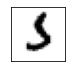

label: 5
predict: 3
0  Probability:0.000000009
1  Probability:0.000085136
2  Probability:0.000000641
3  Probability:0.857381344
4  Probability:0.000000151
5  Probability:0.142475262
6  Probability:0.000025299
7  Probability:0.000000002
8  Probability:0.000029967
9  Probability:0.000002195


In [56]:
show_predicted_probability(x_test_image,y_test_label,prediction,probability,340)

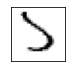

label: 5
predict: 3
0  Probability:0.000000509
1  Probability:0.001570999
2  Probability:0.000069577
3  Probability:0.943101346
4  Probability:0.000000758
5  Probability:0.054764803
6  Probability:0.000141302
7  Probability:0.000031457
8  Probability:0.000275105
9  Probability:0.000044160


In [57]:
show_predicted_probability(x_test_image,y_test_label,prediction,probability,1393)